In [1]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

from keras.applications import MobileNetV2
# load the model
model = MobileNetV2()

Using TensorFlow backend.


In [2]:
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
# 	if 'conv' not in layer.name:
# 		continue
# 	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 input_1 (None, 224, 224, 3)
1 Conv1_pad (None, 225, 225, 3)
2 Conv1 (None, 112, 112, 32)
3 bn_Conv1 (None, 112, 112, 32)
4 Conv1_relu (None, 112, 112, 32)
5 expanded_conv_depthwise (None, 112, 112, 32)
6 expanded_conv_depthwise_BN (None, 112, 112, 32)
7 expanded_conv_depthwise_relu (None, 112, 112, 32)
8 expanded_conv_project (None, 112, 112, 16)
9 expanded_conv_project_BN (None, 112, 112, 16)
10 block_1_expand (None, 112, 112, 96)
11 block_1_expand_BN (None, 112, 112, 96)
12 block_1_expand_relu (None, 112, 112, 96)
13 block_1_pad (None, 113, 113, 96)
14 block_1_depthwise (None, 56, 56, 96)
15 block_1_depthwise_BN (None, 56, 56, 96)
16 block_1_depthwise_relu (None, 56, 56, 96)
17 block_1_project (None, 56, 56, 24)
18 block_1_project_BN (None, 56, 56, 24)
19 block_2_expand (None, 56, 56, 144)
20 block_2_expand_BN (None, 56, 56, 144)
21 block_2_expand_relu (None, 56, 56, 144)
22 block_2_depthwise (None, 56, 56, 144)
23 block_2_depthwise_BN (None, 56, 56, 144)
24 block_2_depthwise_relu 

In [3]:
# load the model
model = MobileNetV2()
# redefine model to output right after the first hidden layer
ixs = [26, 53, 115, 150]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

In [11]:
# load the image with the required shape
img_path = "./images/original_25%.jpg"
img = load_img(img_path, target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)

Feature


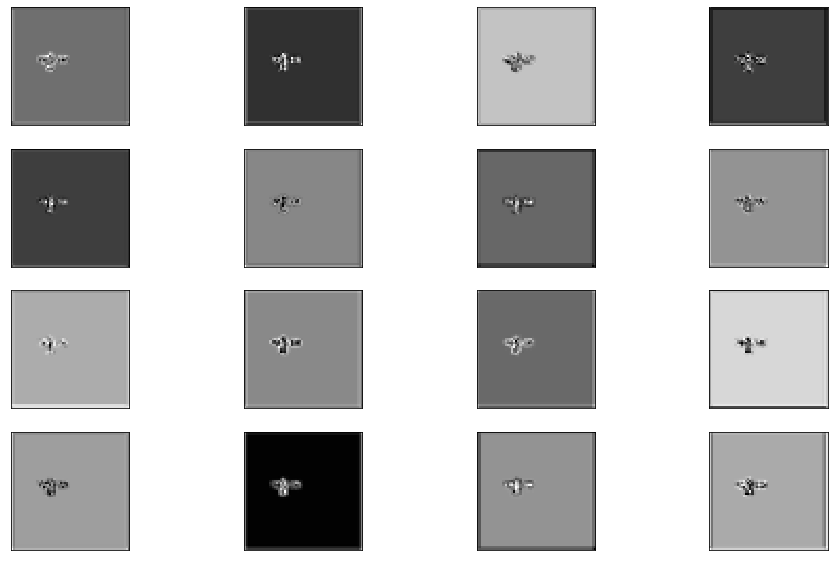

Feature


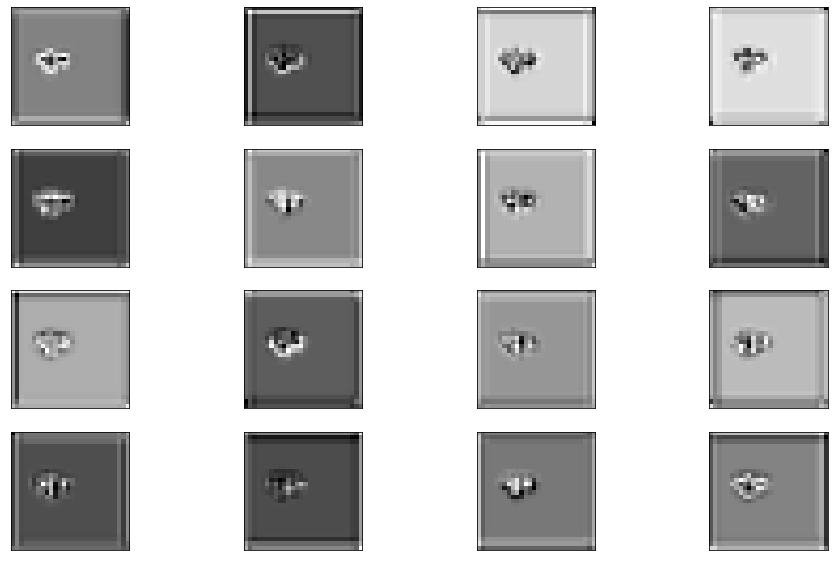

Feature


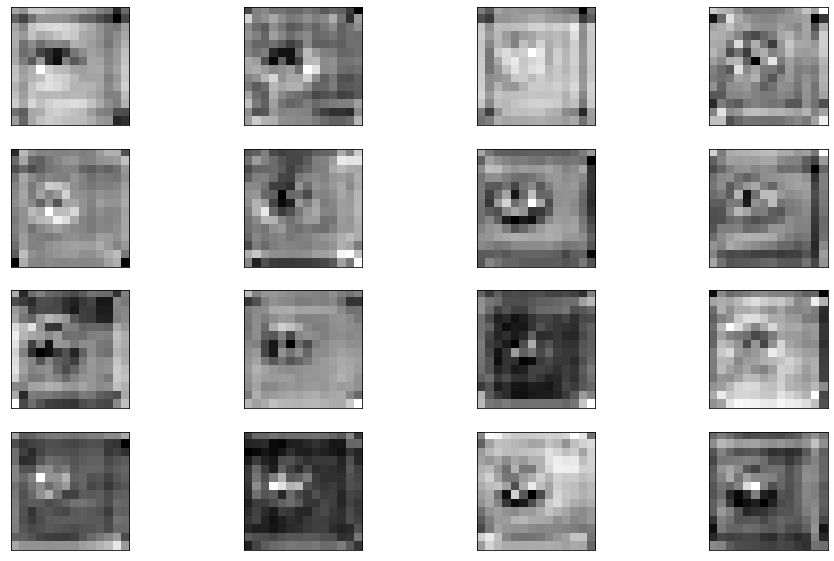

Feature


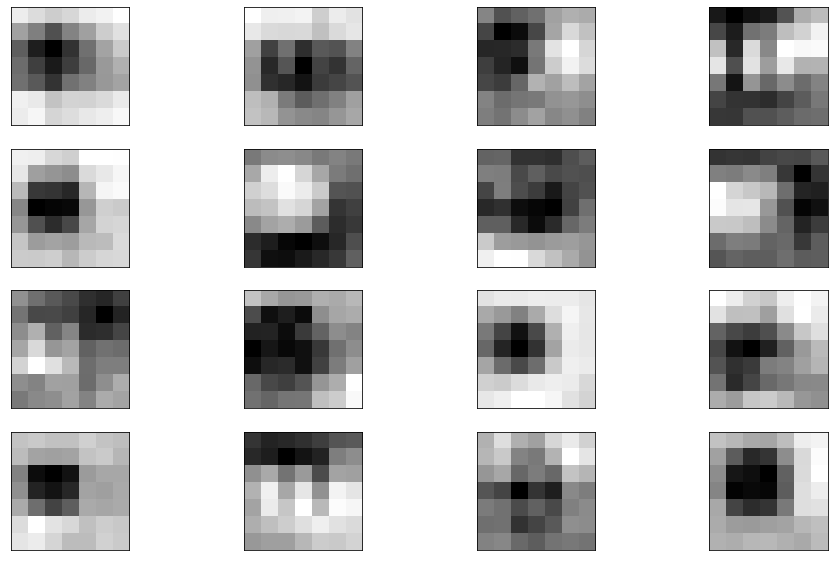

In [12]:
# plot the output from each block
square = 4
# pyplot.figure(figsize=(16, 10))
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
    print("Feature")
    ix = 1
    pyplot.figure(figsize=(16, 10))
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    # show the figure
    pyplot.show()

In [ ]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()

In [1]:
from tensorflow.keras.models import Model
import tensorflow as tf
import cv2
import numpy as np
import glob
from random import randint

from mobilenetv2 import MobileNetv2

In [43]:
import matplotlib.pyplot as plt

In [84]:
model_ = MobileNetv2(input_shape = IMG_SHAPE, k = 1, alpha=1.0)
model_.load_weights('./models/person_mobilenetv2_model_10e.h5')
model_.summary()

Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d_185 (Conv2D)             (None, 256, 256, 32) 896         input_15[0][0]                   
__________________________________________________________________________________________________
batch_normalization_265 (BatchN (None, 256, 256, 32) 128         conv2d_185[0][0]                 
__________________________________________________________________________________________________
activation_180 (Activation)     (None, 256, 256, 32) 0           batch_normalization_265[0][0]    
___________________________________________________________________________________________

In [90]:
print(len(model_.layers))

159


In [100]:
model = Model(inputs=model_.inputs, outputs=model_.layers[150].output)
model.summary()

Model: "model_28"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d_185 (Conv2D)             (None, 256, 256, 32) 896         input_15[0][0]                   
__________________________________________________________________________________________________
batch_normalization_265 (BatchN (None, 256, 256, 32) 128         conv2d_185[0][0]                 
__________________________________________________________________________________________________
activation_180 (Activation)     (None, 256, 256, 32) 0           batch_normalization_265[0][0]    
___________________________________________________________________________________________

(1, 512, 512, 3)


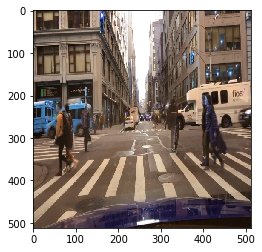

In [101]:
img_path = "bdd_test_5.jpg"
img = cv2.imread(img_path)
img_ = cv2.resize(img, (img_size,img_size))

img = img_.reshape(1,img_size,img_size,3)
img = np.array(img)
print(img.shape)

img=img/255.0

plt.imshow(img_)

In [102]:
feature_maps = model.predict(img)

(16, 16, 1024)


<Figure size 1152x720 with 0 Axes>

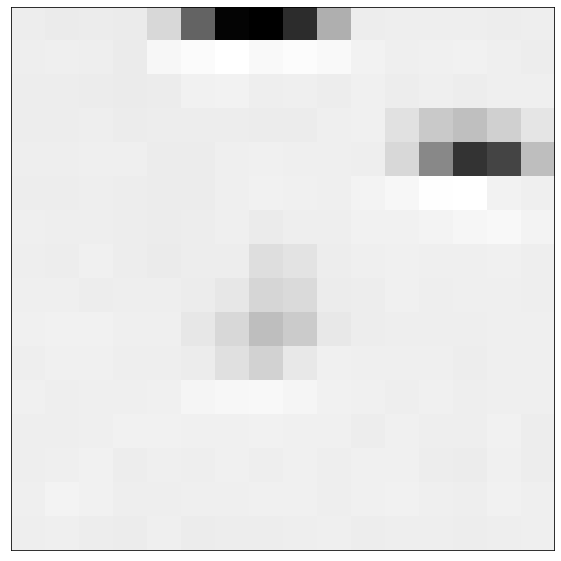

In [103]:
# plot the output from each block
square = 1
pyplot.figure(figsize=(16, 10))
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
    print(fmap.shape)
    
    ix = 1
    pyplot.figure(figsize=(16, 10))
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
#             pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            pyplot.imshow(fmap[:, :, ix-1], cmap='gray')
            ix += 1
    # show the figure
    pyplot.show()